In [397]:
#Lets import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [398]:
#Loading the Dtasets
data=pd.read_csv("/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv")
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [399]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [400]:
# Printing first five rows
data.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [401]:
# printing last 5 rows of the dataset
data.tail(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [402]:
# checking for missing values
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [403]:
# statistical measures about the data
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [404]:
data.shape

(253680, 22)

In [405]:
#feature Engineering
columns_to_drop = ['CholCheck', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']

df = data.drop(columns=columns_to_drop)

In [406]:
df.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0


In [407]:

# Move the "HeartDiseaseorAttack" column to the last position
cols = list(df.columns)
cols.remove("HeartDiseaseorAttack")
cols.append("HeartDiseaseorAttack")
data = df[cols]

In [408]:
data.head()

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,Sex,Age,HeartDiseaseorAttack
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0
3,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11.0,0.0
4,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11.0,0.0


In [409]:
data.isnull().sum()

HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
HvyAlcoholConsump       0
Sex                     0
Age                     0
HeartDiseaseorAttack    0
dtype: int64

In [410]:
# statistical measures about the data
data.describe()

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,Sex,Age,HeartDiseaseorAttack
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.056197,0.440342,8.032119,0.094186
std,0.494934,0.494210,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.230302,0.496429,3.054220,0.292087
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000
75%,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,10.000000,0.000000
max,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000


In [411]:
data.shape

(253680, 12)

In [412]:
X = data.drop(columns='HeartDiseaseorAttack', axis=1)

In [413]:
y = data['HeartDiseaseorAttack']

In [414]:
X.shape

(253680, 11)

In [415]:
y.shape

(253680,)

In [416]:
# data.groupby(['HeartDiseaseorAttack']).size()


In [417]:
#Visualization

1. Heart disease or a heart attack is label

2. Note the class label imbalance ...

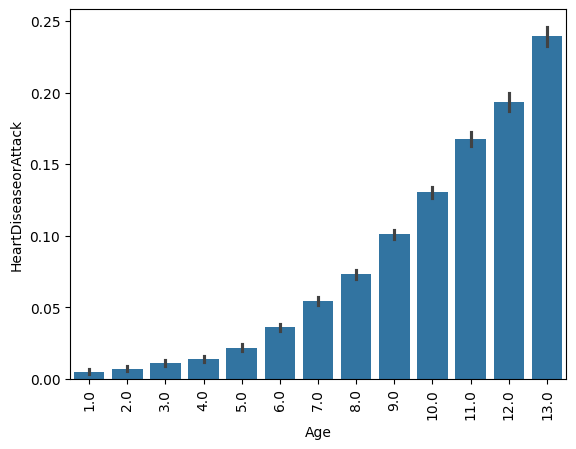

In [418]:
sns.barplot(x=data['Age'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [419]:
data.head(3)

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,Sex,Age,HeartDiseaseorAttack
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0


In [420]:
#HighBP

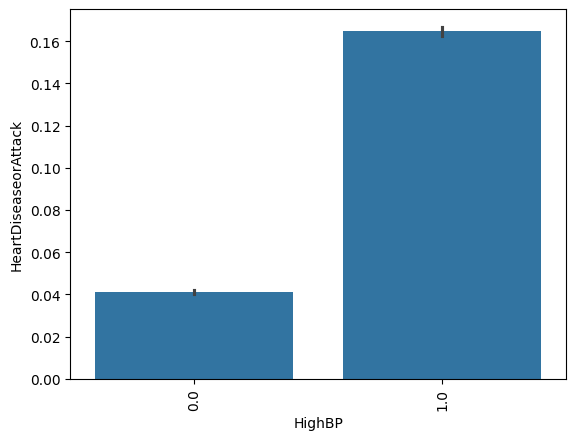

In [421]:
sns.barplot(x=data['HighBP'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [422]:
#HighChol

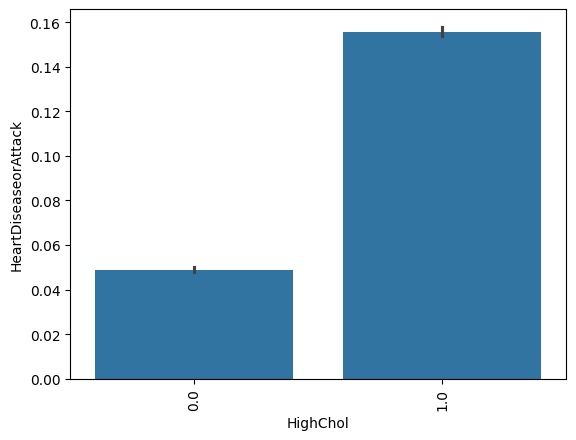

In [423]:
sns.barplot(x=data['HighChol'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [424]:
#BMI

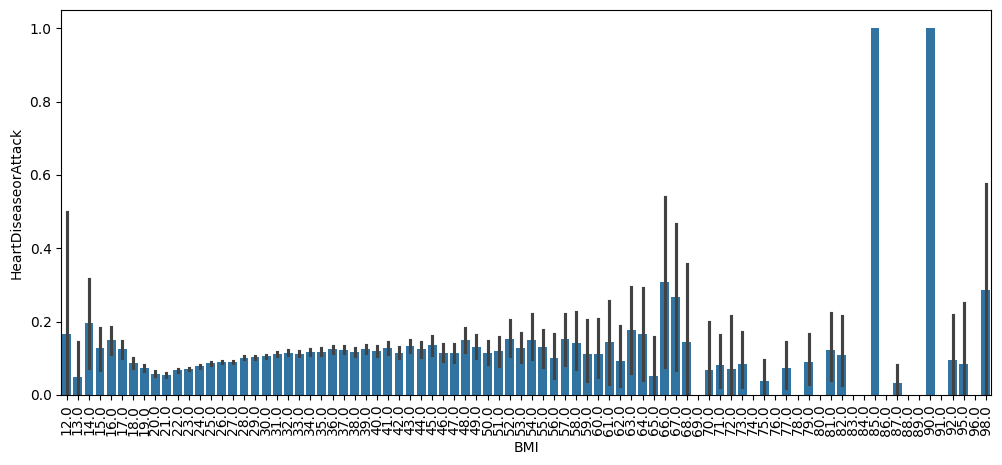

In [425]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['BMI'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [426]:
# Smoker

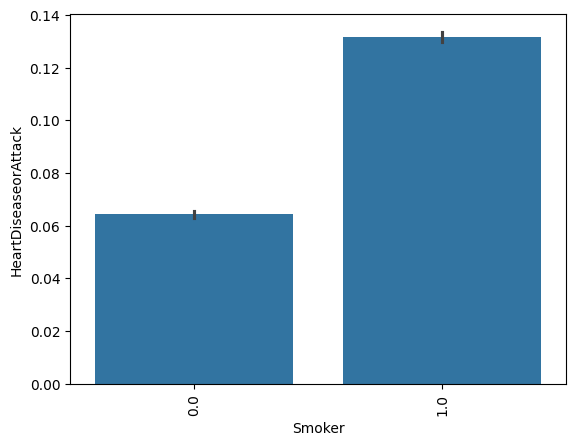

In [427]:
sns.barplot(x=data['Smoker'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [428]:
#Stroke

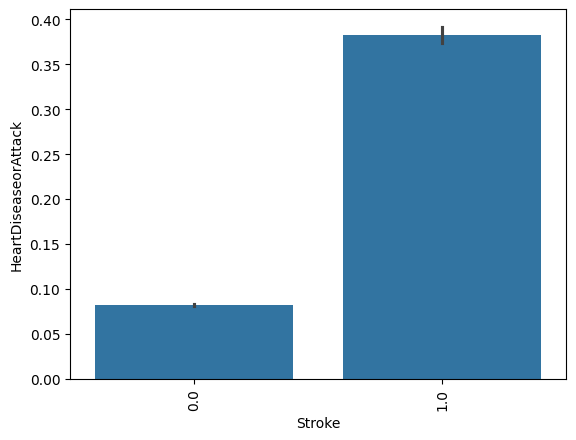

In [429]:
sns.barplot(x=data['Stroke'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [430]:
# Diabetes

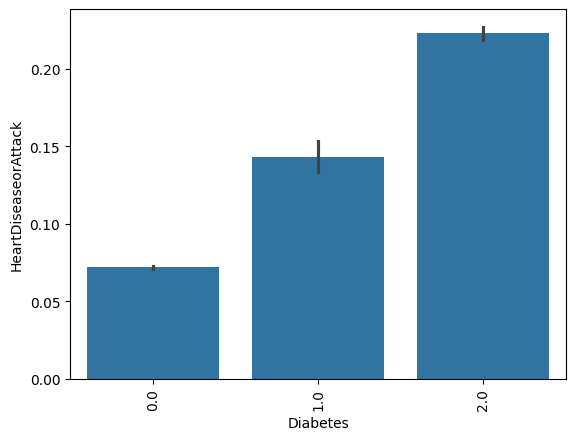

In [431]:
sns.barplot(x=data['Diabetes'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [432]:
# PhysActivity

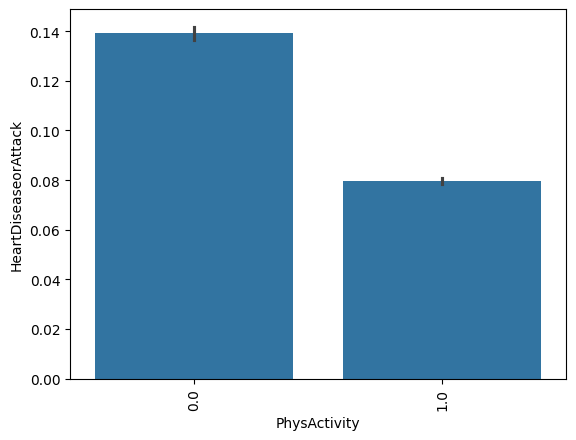

In [433]:
sns.barplot(x=data['PhysActivity'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [434]:
# Fruits

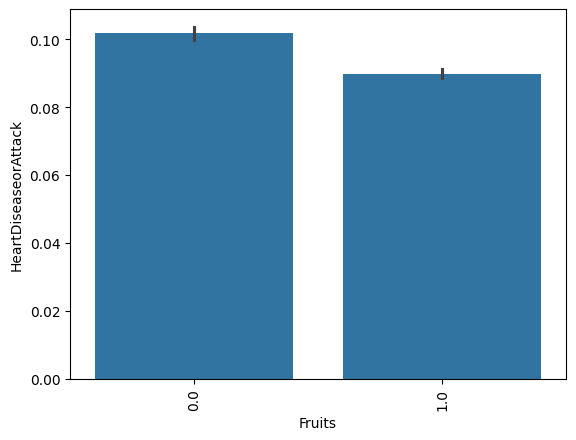

In [435]:
sns.barplot(x=data['Fruits'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [436]:
data.head(3)

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,Sex,Age,HeartDiseaseorAttack
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0


In [437]:
# Sex

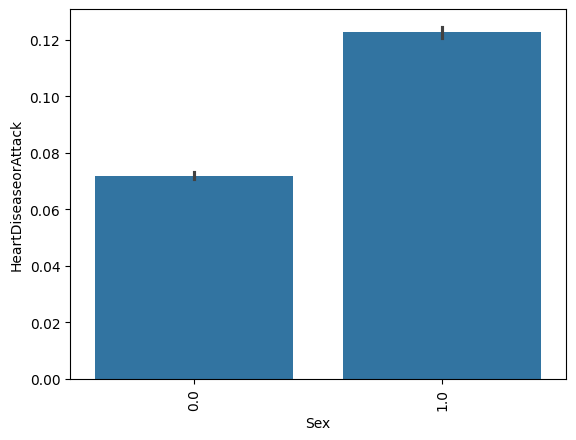

In [438]:
sns.barplot(x=data['Sex'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

In [439]:
# split the dataset to the train and test set, prepare for training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 11)
y_train:  (190260,)
---
X_test:  (63420, 11)
y_test:  (63420,)


**Start step build and training model**

In [440]:
# Define the dictionary to store all results
results = {}

**1.Logistic regresssion model**

In [441]:
%%time
training_start_time = time.time()

logistic_model = LogisticRegression() # call model from lib
logistic_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = logistic_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Logistic Regression model'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
        training_time_total
]

CPU times: user 2.55 s, sys: 1.11 s, total: 3.66 s
Wall time: 1.93 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The results information

In [442]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7bf8239d0b80>
accuracy:  90.76316619362977
precision:  87.66794538824496
recall:  90.76316619362977
f1_score:  87.55233492892299
training time total:  1.7998626232147217


**Confusion matrix heatmap**

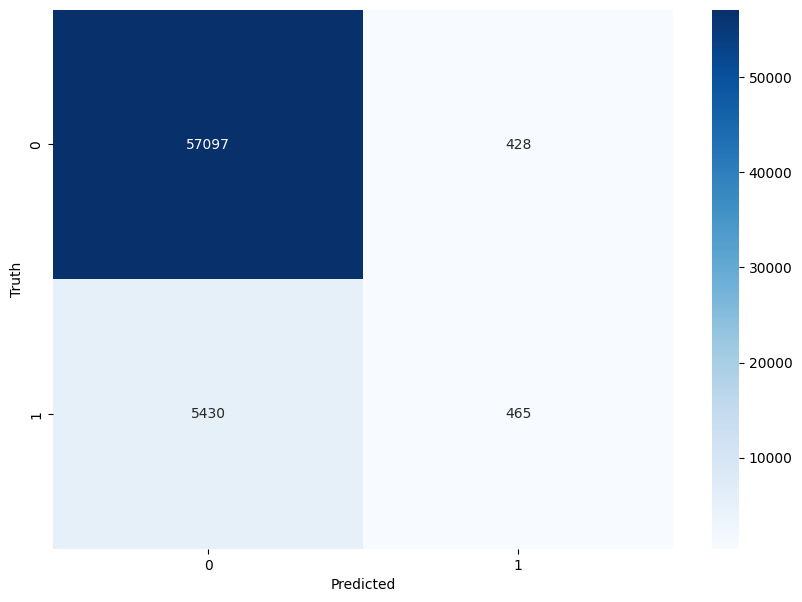

In [443]:
# Calculate confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

**Visualize the accuracy, precision, recall, F1_score**

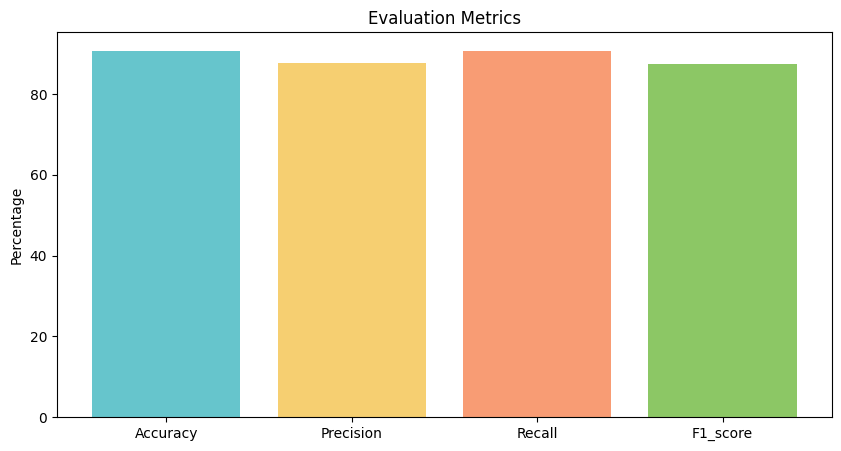

In [444]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

**2.k Nearest Neighbors (k-NN)**

In [445]:
%%time
training_start_time = time.time()

knn_model = KNeighborsClassifier() # call model from lib
knn_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = knn_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
        training_time_total
]

CPU times: user 11.6 s, sys: 134 ms, total: 11.7 s
Wall time: 12.1 s


The results information

In [446]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7bf8239d0b80>
accuracy:  89.61999369284138
precision:  85.88930655727114
recall:  89.61999369284138
f1_score:  87.1458057365688
training time total:  12.038666009902954


**Confusion matrix heatmap**

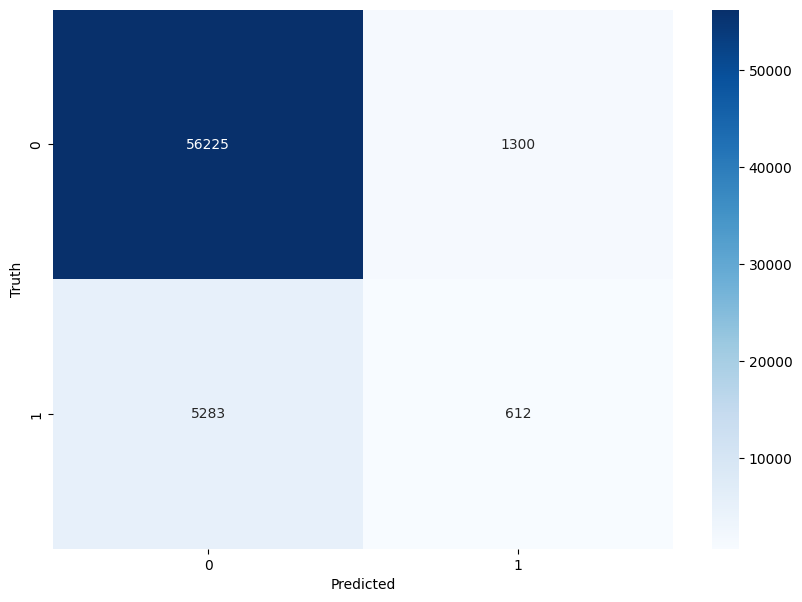

In [447]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

**Visualize the accuracy, precision, recall, F1_score**

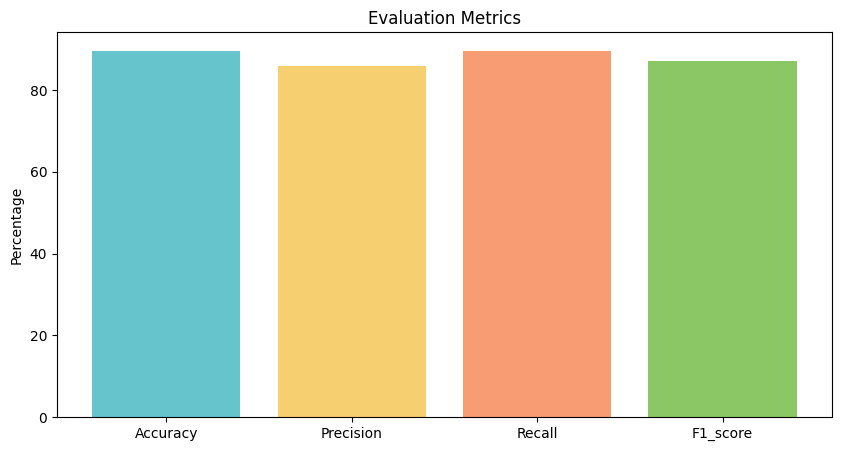

In [448]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

**3.Decision Tree**

In [449]:
%%time
training_start_time = time.time()

decision_tree_model = DecisionTreeClassifier() # call model from lib
decision_tree_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = decision_tree_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Desision Tree'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),

     f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 512 ms, sys: 1.52 ms, total: 513 ms
Wall time: 510 ms


The results information

In [450]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7bf8239d0b80>
accuracy:  89.19899085461999
precision:  85.9380696255495
recall:  89.19899085461999
f1_score:  87.16204082086902
training time total:  0.41404080390930176


**Confusion matrix heatmap**

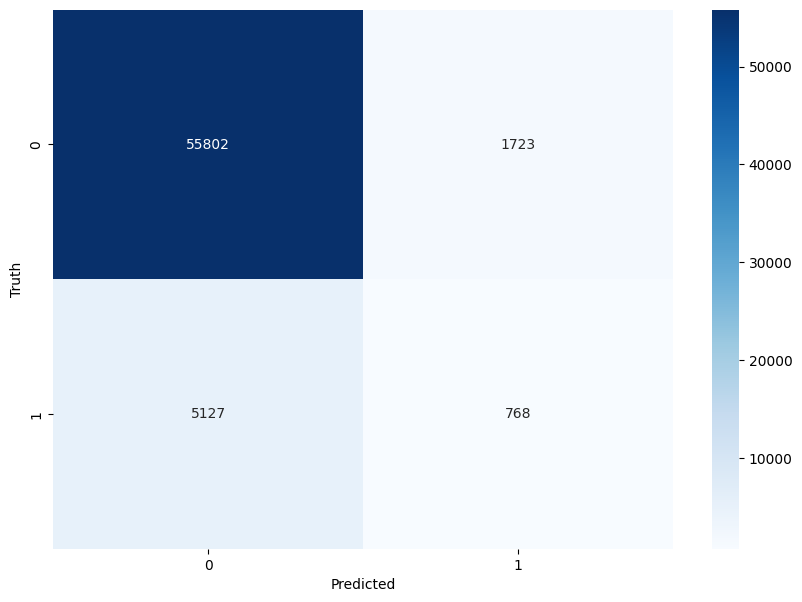

In [451]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

**Visualize the accuracy, precision, recall, F1_score**

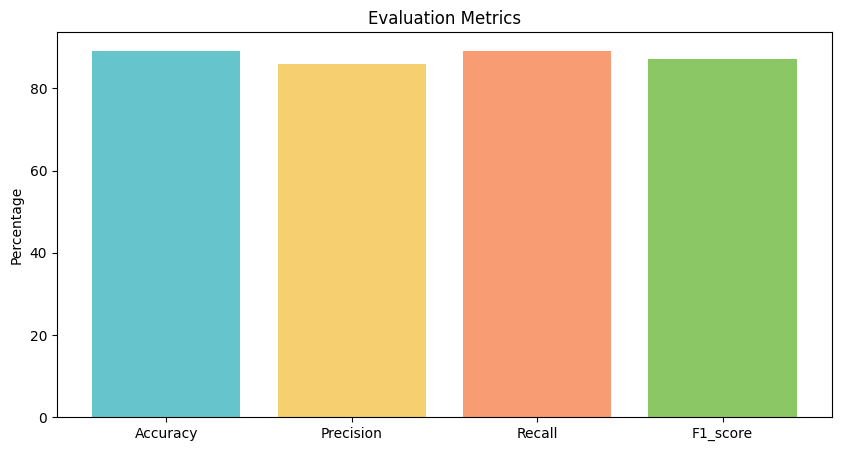

In [452]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

**4.Random forest**

In [453]:
%%time
training_start_time = time.time()

random_forest_model = RandomForestClassifier() # call model from lib
random_forest_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = random_forest_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Random forest'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 17.1 s, sys: 15.2 ms, total: 17.1 s
Wall time: 17.3 s


The results information

In [454]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7bf8239d0b80>
accuracy:  89.41658782718386
precision:  86.08930185801195
recall:  89.41658782718386
f1_score:  87.27938456534248
training time total:  17.21179437637329


**Confusion matrix heatmap**

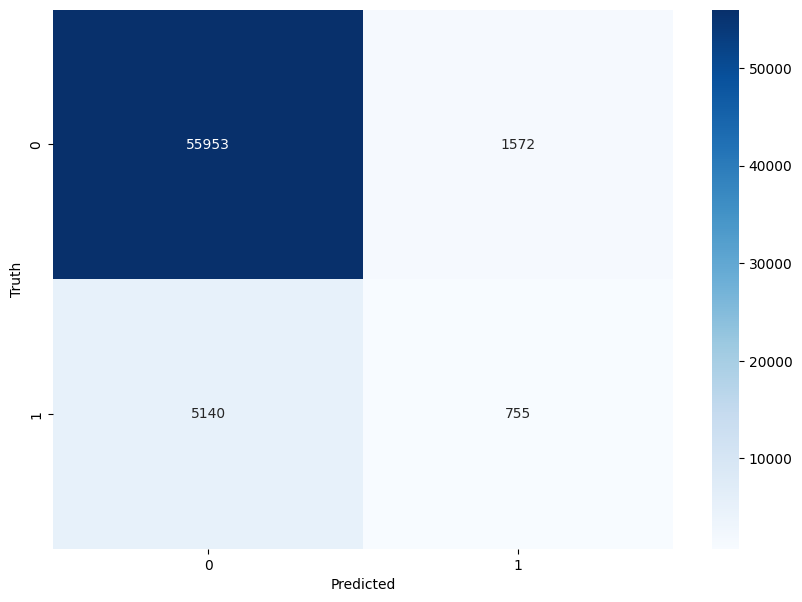

In [455]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

**Visualize the accuracy, precision, recall, F1_score**

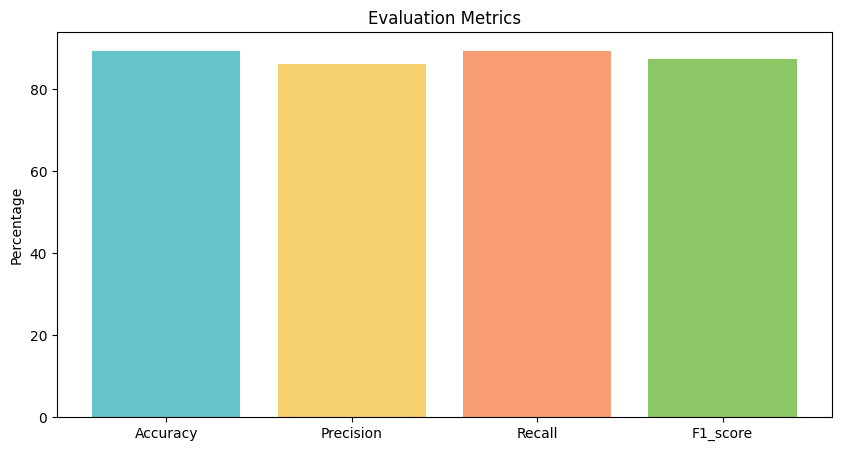

In [456]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']


plt.show()

**5.Neural networks**

In [457]:
%%time
training_start_time = time.time()

neural_network_model = MLPClassifier() # call model from lib
neural_network_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = neural_network_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Neural Networks (Multi-layer Perceptron)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
        training_time_total
]

CPU times: user 2min 16s, sys: 1min 50s, total: 4min 7s
Wall time: 2min 26s


The results information

In [458]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x7bf8239d0b80>
accuracy:  90.77893409019237
precision:  88.04987445726526
recall:  90.77893409019237
f1_score:  86.72678819010923
training time total:  146.5223047733307


**Confusion matrix heatmap**

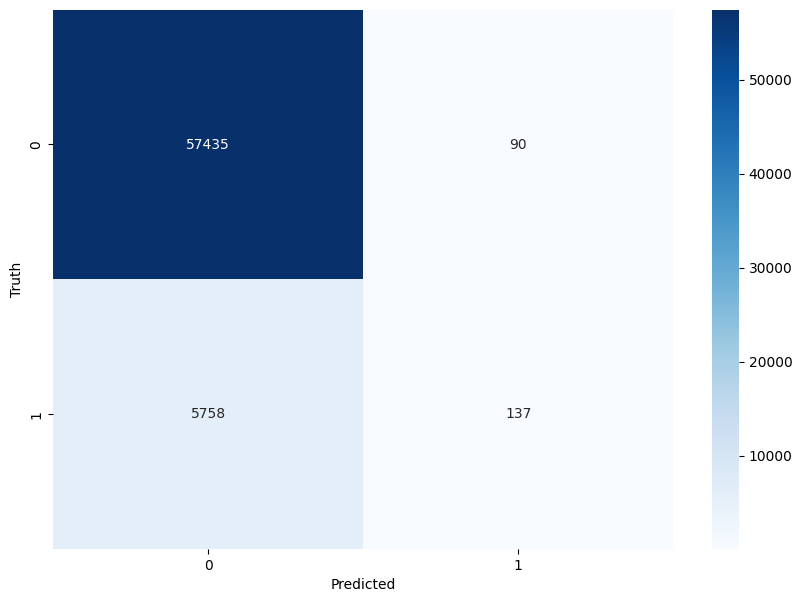

In [459]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

**Visualize the accuracy, precision, recall, F1_score**

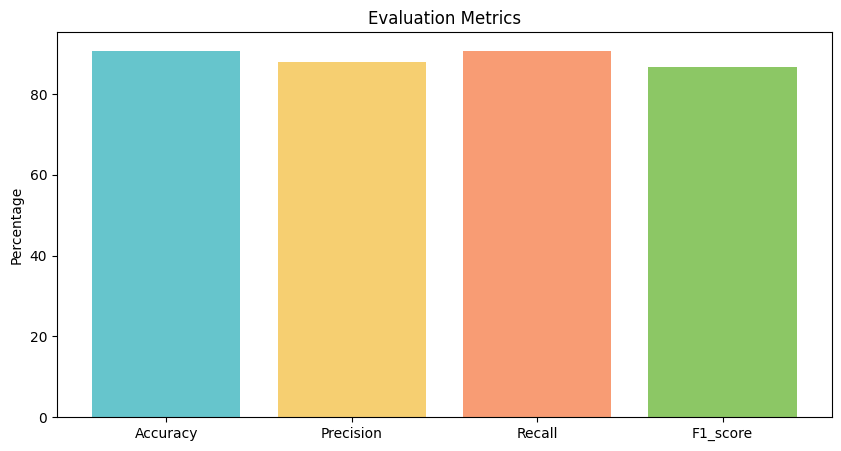

In [460]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')


# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

**Compare results**

In [461]:
dataframe_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.907632,0.876679,0.907632,0.875523,1.799863
k Nearest Neighbors (k-NN),0.896200,0.858893,0.896200,0.871458,12.038666
Desision Tree,0.891990,0.859381,0.891990,0.871620,0.414041
Random forest,0.894166,0.860893,0.894166,0.872794,17.211794
Neural Networks (Multi-layer Perceptron),0.907789,0.880499,0.907789,0.867268,146.522305
